In [23]:
from scipy import optimize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.linear_model import Lasso
import statsmodels.api as sm

pd.options.mode.chained_assignment = None

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
['Female' 'Male']
['Sun' 'Sat' 'Thur' 'Fri']
['Dinner' 'Lunch']


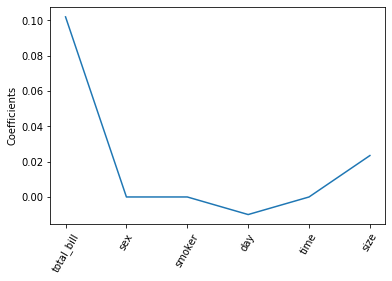

     total_bill  time  size
0            16     0     2
1            10     0     3
2            21     0     3
3            23     0     2
4            24     0     4
..          ...   ...   ...
239          29     0     3
240          27     0     2
241          22     0     2
242          17     0     2
243          18     0     2

[244 rows x 3 columns]


In [24]:
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/restaurant_tip.csv')
print(df.head())
y=np.array(df['tip']).astype('float')

field_names=['total_bill','sex','smoker','day','time','size']
X=df[field_names]

#X['sex']=X['sex'].astype('category')
print(X['sex'].unique())
genders = {"Male": 0, "Female": 1}
X['sex']=X['sex'].map(genders)
smoker={'Yes':1,'No':0}
#X['smoker']=X['smoker'].astype('category')
X['smoker']=X['smoker'].map(smoker)
#X['day']=X['day'].astype('category')
print(X['day'].unique())
day={'Sun':0, 'Sat':6, 'Mon':1,'Tues':2,'Weds':3,'Thur':4, 'Fri':5}
X['day']=X['day'].map(day)
#X['time']=X['time'].astype('category')
print(X['time'].unique())
#X['total_bill']=X['total_bill'].astype('float')
time={'Dinner':0,'Lunch':1}
X['time']=X['time'].map(time)
X['size']=X['size'].astype('int')
X['total_bill']=X['total_bill'].astype('int')

lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

_ = plt.plot(range(len(field_names)),lasso_coef)
_ = plt.xticks(range(len(field_names)),field_names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

X=X.drop(['sex','smoker','day'],axis=1)
print(X)



X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42) 


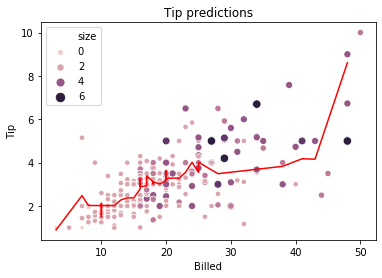

In [25]:
SEED=1

gbt=GradientBoostingRegressor(n_estimators=300, max_depth=1, random_state=SEED)
gbt.fit(X_train, y_train)  

#print(gbt.predict(X_test))
plt.clf()
sns.scatterplot(X['total_bill'],y,size=X['size'],hue=X['size'])

X_test=X_test.sort_values(by='total_bill')
x_prediction=X_test['total_bill']
y_prediction=gbt.predict(X_test)
plt.plot(x_prediction,y_prediction,c="red")

plt.title('Tip predictions')
plt.ylabel('Tip')
plt.xlabel('Billed')
plt.show()



In [36]:
X_ols = sm.add_constant(X) # adding a constant
 
model = sm.OLS(y, X_ols).fit()
predictions = model.predict(X_ols) 
 
print_model = model.summary()
print(print_model)


a0 = model.params['const']
a1 = model.params['total_bill']
a2 = model.params['time']
a3 = model.params['size']


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     70.30
Date:                Sun, 04 Oct 2020   Prob (F-statistic):           1.17e-32
Time:                        12:11:10   Log-Likelihood:                -348.02
No. Observations:                 244   AIC:                             704.0
Df Residuals:                     240   BIC:                             718.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7161      0.204      3.510      0.0

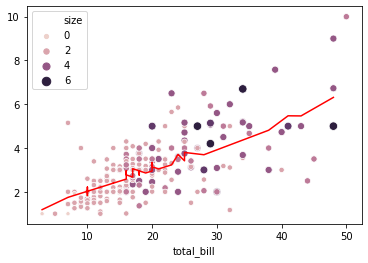

In [37]:
plt.clf()
sns.scatterplot(X['total_bill'],y,size=X['size'],hue=X['size'])

x_prediction=X_test['total_bill']
#lin=np.linspace(min(X_test['total_bill']),max(X_test['total_bill']),len(x_prediction))

y_prediction=[]
for index,value in X_test.iterrows():
    result=a0 + a1*value['total_bill'] + a2*value['time'] +a3*value['size']
    y_prediction.append(result)
    #print(value)

plt.plot(x_prediction,y_prediction,c="red")

In [38]:
print("Lets see the goodness of fit by the ols")

Lets see the goodness of fit by the ols


In [39]:
y_model=gbt.predict(X_train)

residuals = y_model- y_train
deviations = np.mean(y_train) - y_train

# Compute the variance of the residuals and deviations
var_residuals = np.mean(np.square(residuals))
var_deviations = np.mean(np.square(deviations))

# Compute r_squared as 1 - the ratio of RSS/Variance
r_squared = 1 - (var_residuals / var_deviations)
print('R-squared is {:0.2f}'.format(r_squared))


print("R-Squared: what fraction of variation is linear")

R-squared is 0.59
R-Squared: what fraction of variation is linear


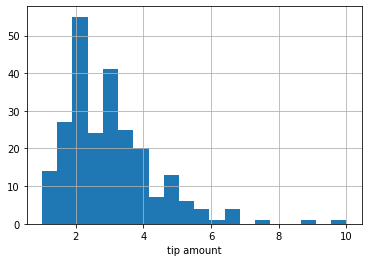

In [42]:
df['tip'].hist(bins=20)
plt.xlabel('tip amount')
plt.show()

In [72]:
def gaussian_model(x, mu, sigma):
    coeff_part = 1/(np.sqrt(2*np.pi*sigma**2))
    exp_part=np.exp(-(x-mu)**2/(2*sigma**2))
    return coeff_part * exp_part



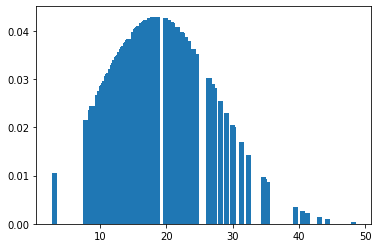

In [74]:
samples = np.random.choice(df['total_bill'], 100)

sample_mean=np.mean(samples)
sample_stdev=np.std(samples)

population_model = gaussian_model(samples, mu=sample_mean, sigma=sample_stdev)

plt.bar(samples,population_model)
plt.show()
u_guess = np.mean(sample_distances)
sigma_guess=np.std(sample_distances)#print(population_model)

In [77]:
mu_guess = np.mean(sample)
sigma_guess=np.std(sample)

probs = np.zeros(len(samples))
for n, bill in enumerate(samples):
    probs[n] = gaussian_model(bill, mu=mu_guess, sigma=sigma_guess)

# Compute and print the log-likelihood as the sum() of the log() of the probabilities
loglikelihood = np.sum(np.log(probs))
print('For guesses mu={:0.2f} and sigma={:0.2f}, the loglikelihood={:0.2f}'.format(mu_guess, sigma_guess, loglikelihood))

For guesses mu=20.28 and sigma=9.31, the loglikelihood=-366.18


In [78]:
# Create an array of mu guesses, centered on sample_mean, spread out +/- by sample_stdev
low_guess = sample_mean - 2*sample_stdev
high_guess = sample_mean + 2*sample_stdev
mu_guesses = np.linspace(low_guess, high_guess, 101)

# Compute the loglikelihood for each model created from each guess value
loglikelihoods = np.zeros(len(mu_guesses))
for n, mu_guess in enumerate(mu_guesses):
    loglikelihoods[n] = compute_loglikelihood(samples, mu=mu_guess, sigma=sample_stdev)


NameError: name 'compute_loglikelihood' is not defined